# Graphically exploring data

## Introduction to plotting

Although it's essential to quantitatively assess any conclusion drawn from the data, the human visual system is still one of the most advanced apparatus to detect patterns in data and it allows for quick exploration of complex relationships. Visualizations are also a highly efficient way of communicating insights drawn from the data. Therefore, it is important to know how to graphically represent the underlying data in a way that is suitable for humans to understand.

There are many plotting packages in Python, making it possible to create diverse visualizations such as interactive web graphics, 3D animations, statistical visualizations, and map-based plots. When starting out, it can be helpful to find an example of how a plot looks that you want to create and then copy and modify that code. Examples of plots can be found in many excellent online Python plotting galleries, such as [this](https://matplotlib.org/gallery.html), [this](https://seaborn.pydata.org/examples/), and [this](https://python-graph-gallery.com/all-charts/). 

Our focus will be on two of the most useful packages for researchers: `matplotlib`, which is a robust, detail-oriented, low level plotting interface, and `seaborn`, which provides high level functions on top of `matplotlib` and allows the plotting calls to be expressed more in terms what is being explored in the underlying data rather than what graphical elements to add to the plot.  The high-level figures created by `seaborn` can be configured via the `matplotlib` parameters, so learning these packages in tandem is useful.

To facilitate the understanding of plotting concepts, the initial examples here will not include data frames, but instead have simple lists holding just a few data points.
To create a line plot, the `plot()` function from `matplotlib` can be used.

In [1]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [1, 2, 4, 3]
plt.plot(x ,y)

In [2]:
# In some versions of the Jupyter Notebook, the plot might not show up right away. If that is the case,
# first try to rerun the code. If that does not work, run the following line and then try to plot again.
#%matplotlib inline
# Note that this will only need to be done the first time you create a plot in a notebook
# all subsequent plots will show up as expected.

Using `plot()` like this is not very explicit since a few things happens "under the hood" e.g. a figure is automatically created and it is assumed that the plot should go into the currently active region of this figure. This gives little control over exactly where to place the plots within a figure and how to make modifications the plot after creating it, e.g. adding a title or labeling the axis.

To facilitate modifications to the plot, it is recommended to use the object oriented plotting interface in `matplotlib`, where an empty figure and at least one axes object is explicitly created before a plot is added to it. This figure and its axes object are assigned to variable names which are used for plotting. In `matplotlib`, an axes object refers to what you would often call a subplot colloquially and it is named "axes" because it consists of an x-axis and a y-axis by default.

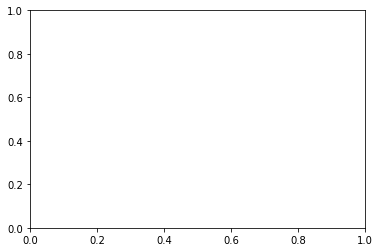

In [3]:
fig, ax = plt.subplots()

Calling `subplots()` returns two objects, the figure and its axes object. Plots can be added to the axes object of the figure using the name we assigned to the returned axes object (`ax` by convention).

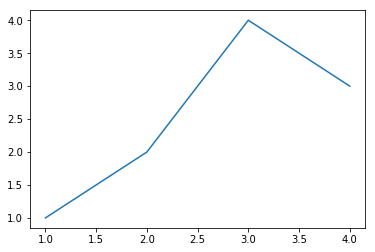

In [4]:
fig, ax = plt.subplots()
ax.plot(x, y)

To create a scatter plot, use `scatter()` instead of `plot()`.

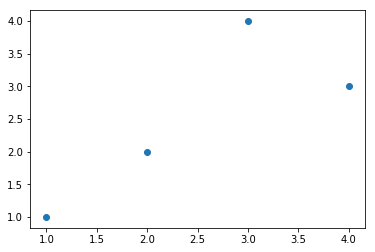

In [5]:
fig, ax = plt.subplots()
ax.scatter(x, y)

Plots can also be combined together in the same axes. The line style and marker color can be changed to facilitate viewing the elements in th combined plot.

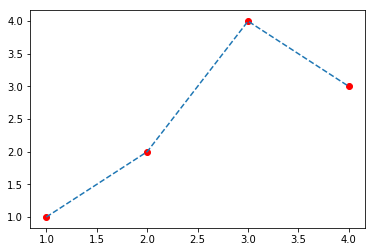

In [6]:
fig, ax = plt.subplots()
ax.scatter(x, y, color='red')
ax.plot(x, y, linestyle='dashed')

And plot elements can be resized.

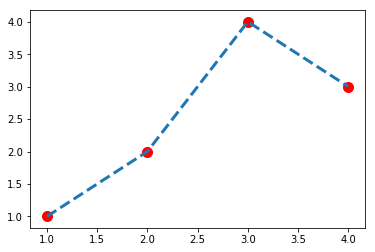

In [7]:
fig, ax = plt.subplots()
ax.scatter(x, y, color='red', s=100)
ax.plot(x, y, linestyle='dashed', linewidth=3)

It is common to modify the plot after creating it, e.g. adding a title or label the axis.

Text(0.5,0,'Measurement X')

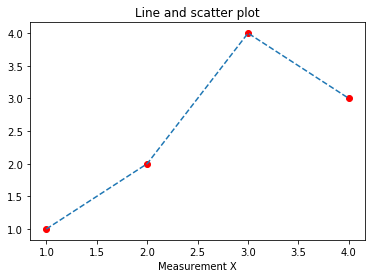

In [8]:
fig, ax = plt.subplots()
ax.scatter(x, y, color='red')
ax.plot(x, y, linestyle='dashed')

ax.set_title('Line and scatter plot')
ax.set_xlabel('Measurement X')

The scatter and line plot can easily be separated into two subplots within the same figure. Instead of assigning a single returned axes to `ax`, the two returned axes objects are assigned to `ax1` and `ax2` respectively.

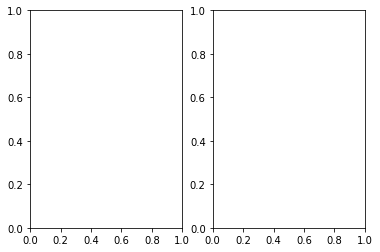

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)
# The default is (1, 1), that's why it does not need
# to be specified with only one subplot

To prevent plot elements, such as the axis ticklabels from overlapping, `tight_layout()` method can be used.

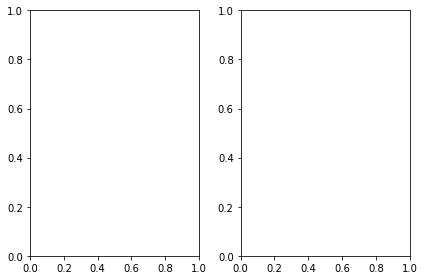

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout()

The figure size can easily be controlled when it is created.

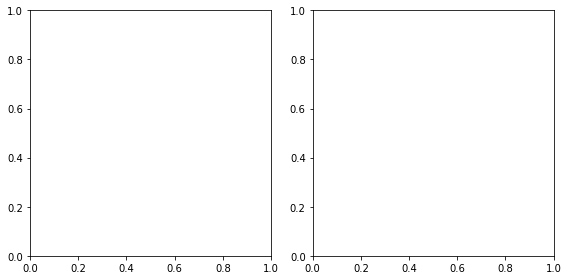

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4)) # This refers to the size of the figure in inches when printed or in a PDF
fig.tight_layout()

Bringing it all together to separate the line and scatter plot.

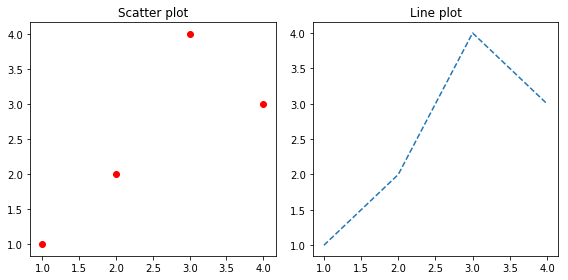

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.scatter(x, y, color='red')
ax2.plot(x, y, linestyle='dashed')

ax1.set_title('Scatter plot')
ax2.set_title('Line plot')
fig.tight_layout()

> #### Challenge 2
> 
> 1. There are a plethora of colors available to use in `matplotlib`. Change the color of the line and the dots in the figure using [your favorite color from this list](https://stackoverflow.com/a/37232760/2166823).
> 2. Use the documentation to also change the styling of the line in the line plot and the type of marker used in the scatter plot (you might need to search online for this).

### Saving graphs

Figures can be saved by calling the `savefig()` method and specifying the name of file to create. The resolution of the figure can be controlled by the `dpi` parameter.

In [13]:
fig.savefig('scatter-and-line.png', dpi=300)

A PDF-file can be saved by changing the extension in the specified file name. Since PDF is a vector file format, there is not need to specify the resolution.

In [14]:
fig.savefig('scatter-and-line.pdf')

This concludes the customization section. The concepts taught here will be applied in the next section on how to choose a suitable plot type for data sets with many observations.

## Plotting data frames

If the data frame from the previos lecture is not loaded, read it in first.

In [15]:
import pandas as pd

world_data = pd.read_csv('../data/world-data-gapminder.csv')

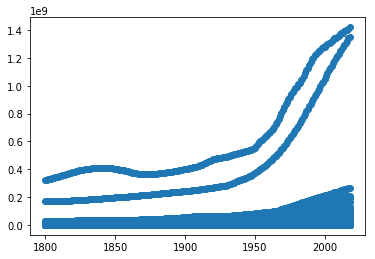

In [16]:
fig, ax = plt.subplots()
ax.scatter(x='year', y='population', data=world_data)

The reason for the appearance of this graph is that one scatter dot has been added for each year for every country. To instead see how the world's total population has changes over the years, the population for  all countries for each year needs to be summed together. This can be done using the data frame techniques from the preiovus lecture.

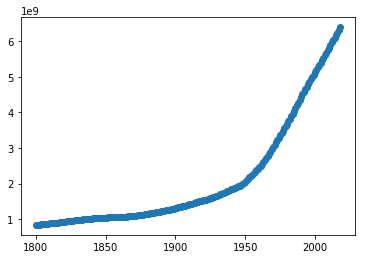

In [17]:
# One could also do `as_index=False` with `groupby()`
world_pop = world_data.groupby('year')['population'].sum().reset_index()

fig, ax = plt.subplots()
ax.scatter(x='year', y='population', data=world_pop)

It is possibe to use `matplotlib` in this way to explore visual relaitonships in data frame. However, it gets complicated once we want to include more variable, e.g. stratifying the data in subplots based on region and income level in the example above would include writing double loops and keeping track of plot layout and grouping variables manually.

## Visual data exploration with `seaborn`

When visually exploring data with lots of variables, it is in many cases easier to think in terms of what is to be explored in the data, rather than what graphical elements are to be added to the plot. For example, instead of instructing the computer to "go through a data frame and plot any observations of country-X in blue, any observations of country-Y in red, etc", it can be easier to just type "color the data by country".


Facilitating semantic mappings of data variable to graphical elements is one of the goals of the [`seaborn`](https://seaborn.pydata.org/introduction.html#introduction) plotting package.
Thanks to its functional way of interfacing with data, only minimal changes are required if the underlying data change or to switch the type of plot used for the visualization. `seaborn` provides a language that facilitates thinking about data in ways that are conducive for exploratory data analysis and allows for the creation of publication quality plots with minimal adjustments and tweaking.

The syntax of plotting with `seaborn` was introduced briefly already in the introductory lecture and it is similar to how matplotlib plots data frames. For example, to make the same scatter plot as above:

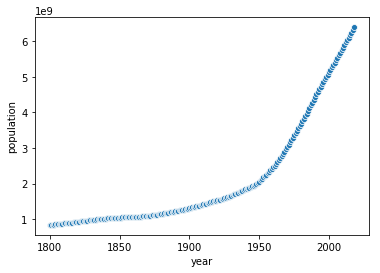

In [19]:
import seaborn as sns

sns.scatterplot(x='year', y='population', data=world_pop)

In addition to providing a data-centric syntax, `seaborn` also facilitates visualization of common statistical aggregations. For example, the when creating a line plot in `seaborn`, the default is aggregate and average all observations with the same value on the x-axis, and to create a shaded region representing the 95% confidence interval for these observations.

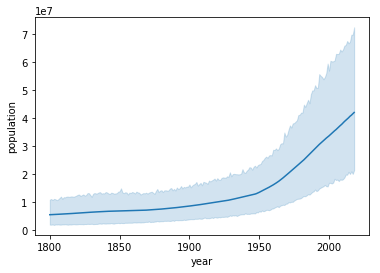

In [20]:
sns.lineplot(x='year', y='population', data=world_data)

In this case, it would be more appropriate to have the shaded area describe the variation in the data, such as the standard deviation, rather than an inference about the reproducilibty.

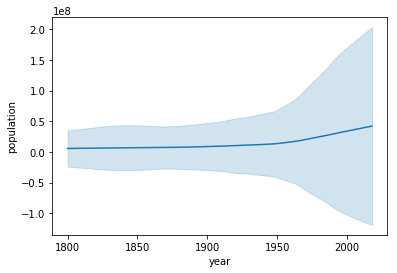

In [21]:
sns.lineplot(x='year', y='population', data=world_data, ci='sd')

To change from showing the average world population per country per year to showing the total population for all countries per year, the `estimator` parameter can be used. Here, the shaded are is also removed with `ci=None`.

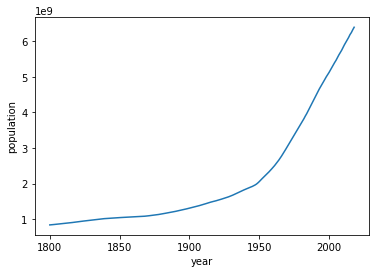

In [22]:
# The `estimator` parameter is currently non-functional for sns.scatterplot, but will be added soon
sns.lineplot(x='year', y='population', data=world_data, estimator='sum', ci=None)

## Changing graph aesthetics

The returned object is an matplotlib axes, so all configuration available through `matplotlib` can be applied to the returned object by first assigning it to a variable name (`ax` by convention).

Text(0.5,0,'Year')

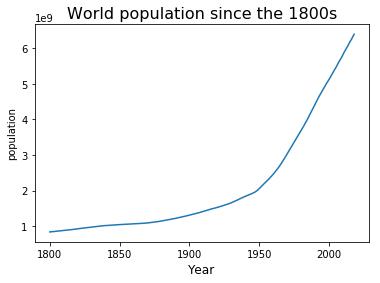

In [23]:
ax = sns.lineplot(x='year', y='population', data=world_data, estimator='sum', ci=None)
ax.set_title('World population since the 1800s', fontsize=16)
ax.set_xlabel('Year', fontsize=12)

In addition to all the customization available through the standard `matplotlib` syntax, `seaborn` also offers its own functions for changing the appearance of the plots.

In essense, these functions are shortcuts to facilitate changing many `matplotlib` parameters. For example, a more effective approach than setting individual font sizes or colors of graphical elements is to set the overall size and style for all graphs.

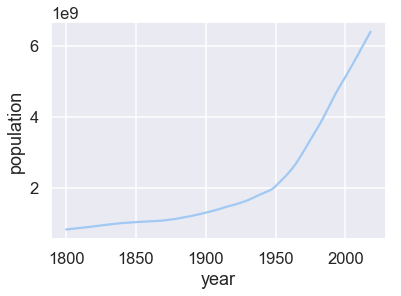

In [24]:
# TODO in general, be sure to link seaborn documentation where appropriate
sns.set(context='talk', style='darkgrid', palette='pastel')
sns.lineplot(x='year', y='population', data=world_data, estimator='sum', ci=None)

These functions are like changing the settings in a graphical program and will apply to all folowing plots. 

> #### Challenge 3
> 
> Find out which styles and contexts are available. Try some of them out and choose your favorite style and contxt. *Hint* This information is available both through the built-in and the online documentation.

For the rest of this tutorial, the `white` style will be used, 

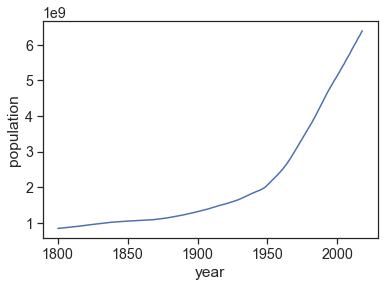

In [25]:
sns.set(context='notebook', style='ticks', font_scale=1.3)
sns.lineplot(x='year', y='population', data=world_data, estimator='sum', ci=None)

For styles that include the frame around the plot, there is a special `seaborn` function to remove the top- and leftmost borders (again by modifying the underlying `matplotlib` parameters).

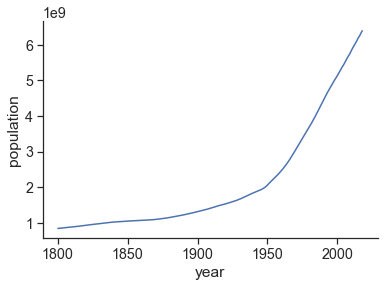

In [26]:
sns.lineplot(x='year', y='population', data=world_data, estimator='sum', ci=None)
sns.despine()

If the style options exposed through `seaborn` are not sufficient, it is possible to change all plot parameters directly through the `matplotlib` [rc and style interfaces](https://matplotlib.org/users/customizing.html#customizing-matplotlib).

## Exploring relationships between two quantitative variables

As mentioned above, the strength of a descriptive plotting syntax is being able to describe the plot appearance in human-friendly vocabulary and have the computer assign variables to graphical objects accordingly. For example, to plot subsets of the data in different colors, the `hue` parameter can be used.

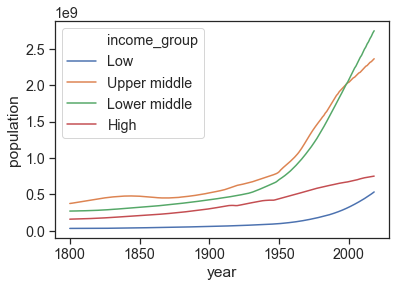

In [27]:
# TODO this part can be changed to a more interesting parameter related to education for example.
# TODO altough it might be better to change the next part, the catplots.
sns.lineplot(x='year', y='population', hue='income_group', 
            data=world_data, ci=None, estimator='sum')

Accessibility can be increased by changing the style of each line and not only relying on color to separate them.

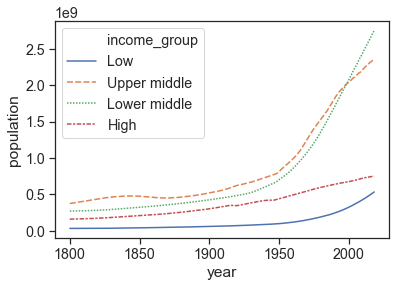

In [28]:
sns.lineplot(x='year', y='population', hue='income_group', style='income_group',
            data=world_data, ci=None, estimator='sum')

Before continuing to explore this data, there is one modification that can be done to improve the current plot. `income_group` is an ordinal variable, i.e. a categorical variable with an inherent order to it. `seaborn` has not plotted the hues in the order we would expect (low, lower-middle, upper-middle, high). A custom order can easily be specified by passing a list to the `hue_order` parameter, but this would have to be done for every plot. A better approach would be to encode the order in the data frame itself, using the top level `pandas` function `Categorical()`.

In [29]:
world_data['income_group'] = (
    pd.Categorical(
        world_data['income_group'], ordered=True,
        categories=['Low', 'Lower middle', 'Upper middle', 'High'])
)
world_data['income_group'].dtype

CategoricalDtype(categories=['Low', 'Lower middle', 'Upper middle', 'High'], ordered=True)

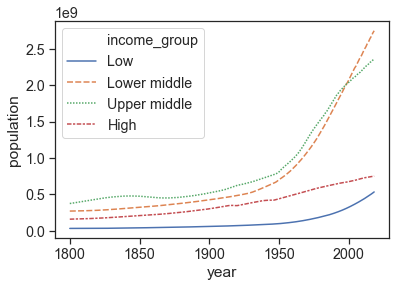

In [30]:
sns.lineplot(x='year', y='population', hue='income_group', style='income_group',
            data=world_data, ci=None, estimator='sum')

The legend now has the colors in the expected order. This modification also ensures that when making plots with income groups on the x- or y-axis, they will be plotted in the right order.

### Conditioning quantitative relationships on qualitative variables

It is difficult to explore multiple categorical relationships within one single plot. For example, to see how the income groups compare within each region, the `hue` and `style` variables could be used for different variables, but this makes the plot very difficult to interpret.

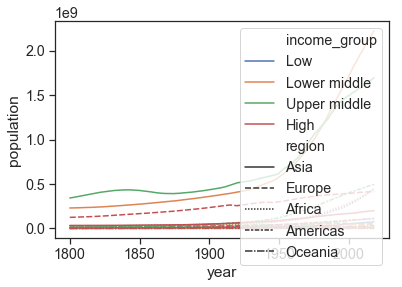

In [31]:
sns.lineplot(x='year', y='population', hue='income_group', style='region',
            data=world_data, ci=None, estimator='sum')

An effective approach for exploring multiple categorical variables in a data set is to plot so-called "small multiples" of the data, where the same type of plot is used for different subsets of the data. These plots are drawn in rows and columns forming a grid pattern, and can be referred to as a "lattice", "facet", or "trellis" plot.

Visualizing categorical variables in this manner is a key step in exploratory data analysis, and thus `seaborn` has a dedicated plot function for this, called `relplot()` (for "relational plot" since it viusalizes the rlationships between two numerical varibles). The syntax to `relplot()` is very similar to `lineplot()`, but since `relplot()` creates scatter plots by default, we need to specify that the kind of plot we want is a line plot.

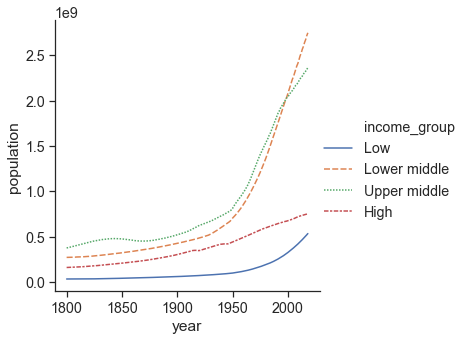

In [32]:
# Create the same plot as above
sns.relplot(x='year', y='population', hue='income_group', style='income_group', kind='line',
            data=world_data, ci=None, estimator='sum')

The region variable can now be mapped to different facets/subplots in a grid pattern.

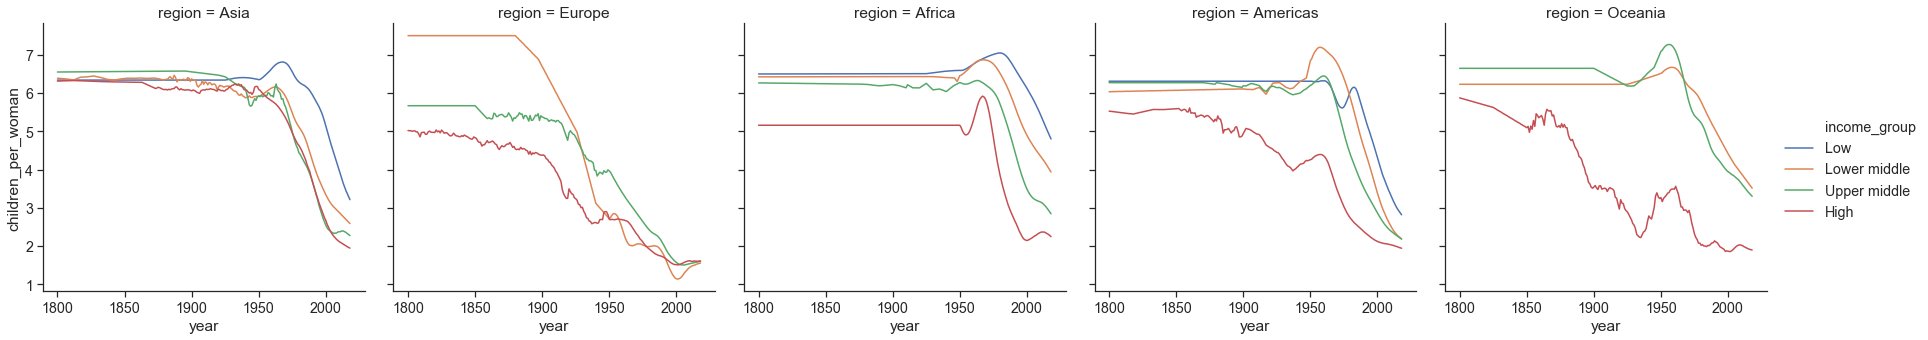

In [33]:
# TODO switch this to some more interesting column if there is time
sns.relplot(x='year', y='children_per_woman', data=world_data,
            kind='line', hue='income_group', col='region', ci=None)

It's a little hard to see becuse the figure is very wide and has been shrunk to fit in the notebook. To avoid this, `relplot()` can use the `col_wrap` parameter to plot on several rows.

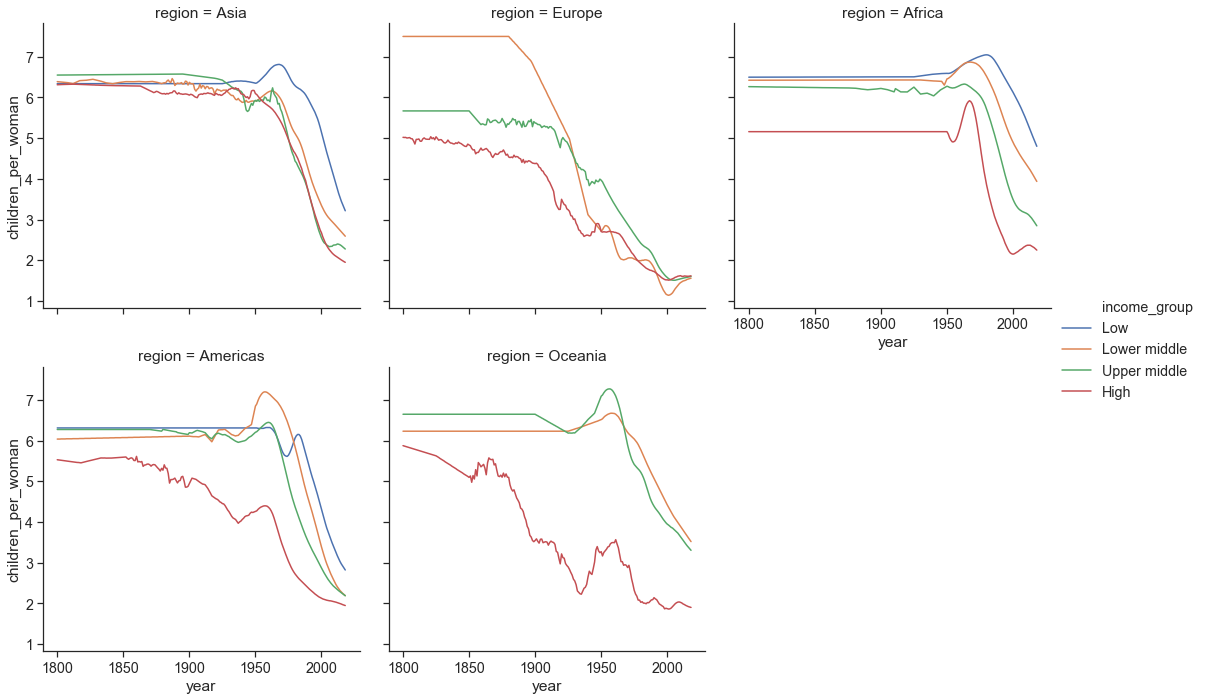

In [34]:
sns.relplot(x='year', y='children_per_woman', data=world_data,
            kind='line', hue='income_group', col='region', ci=None,
           col_wrap=3)

The `height` and `aspect` parameters can be used to set the height and width of each facet.

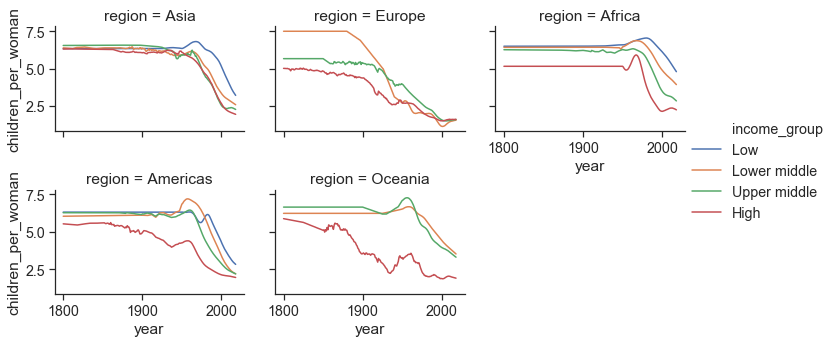

In [35]:
sns.relplot(x='year', y='children_per_woman', data=world_data,
            kind='line', hue='income_group', col='region', ci=None,
           col_wrap=3, height=2.5, aspect=1.3)

The return object is a grid (a special kind of figure) and can therefore not be placed in another figure as before. It is saved just as any `matplotlib` figure with `savefig()`, but has some special methods for easily changing plot aethetics. Remember that names such as `fig`, `ax`, and here `g`, are only by convention, and any variable name could have been used.

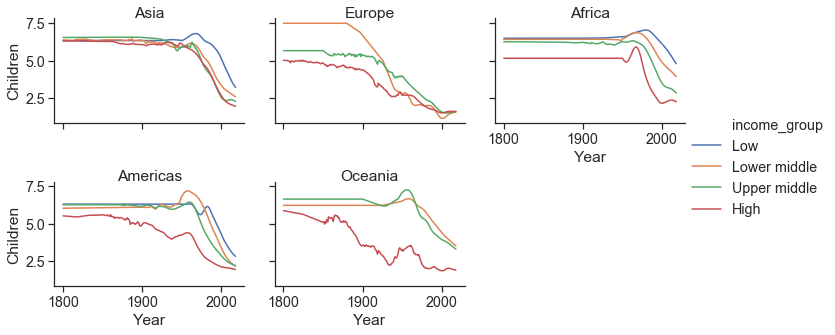

In [36]:
g = sns.relplot(x='year', y='children_per_woman', data=world_data,
            kind='line', hue='income_group', col='region', ci=None,
           col_wrap=3, height=2.5, aspect=1.3)
g.set_titles('{col_name}', y=0.95)
g.set_axis_labels(y_var='Children', x_var='Year')
g.savefig('grid-figure.png')

In [37]:
#TODO comment on what can be seen in the plot, we willl learn about children per woman later so wold be nice wih soething else

The other kind of plot that explores the relationship between two quantitative variables is `scatterplot()`. This is the default in the  `relplot()` function.

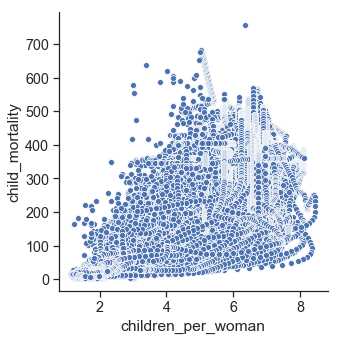

In [38]:
sns.relplot(x='children_per_woman', y='child_mortality', data=world_data)

This does not look quite as expected... the reason is that we have plotted multiple data points per country, one for each year. This is probably not what we want and we can filter the data to focus on a specific year.

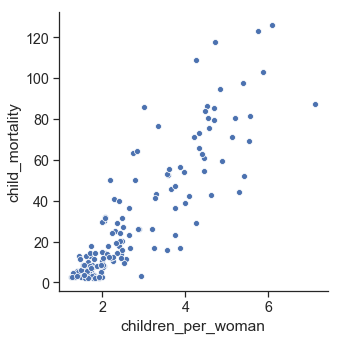

In [39]:
# TODO this could be changes to another relationship since I am using child mortality and
# children per woman in the subplots lineplots
world_data_2018 = world_data.loc[world_data['year'] == 2018]
sns.relplot(x='children_per_woman', y='child_mortality', data=world_data_2018)

Now there appears to be a quite strong relationship. Just like previosuly, this can be easily explored further by assigning the a variable to the hue semantic and creating small multiples based on another variable.

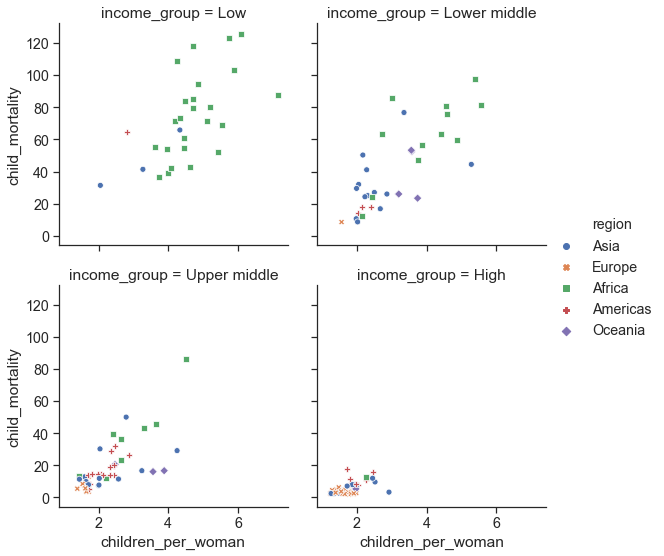

In [40]:
sns.relplot(x='children_per_woman', y='child_mortality', col='income_group',
            hue='region', style='region', data=world_data_2018, col_wrap=2, height=4)

An interesting aspect to explore is how this relationship has changed over time for different income groups. This can be done by selecting data from multiple years.

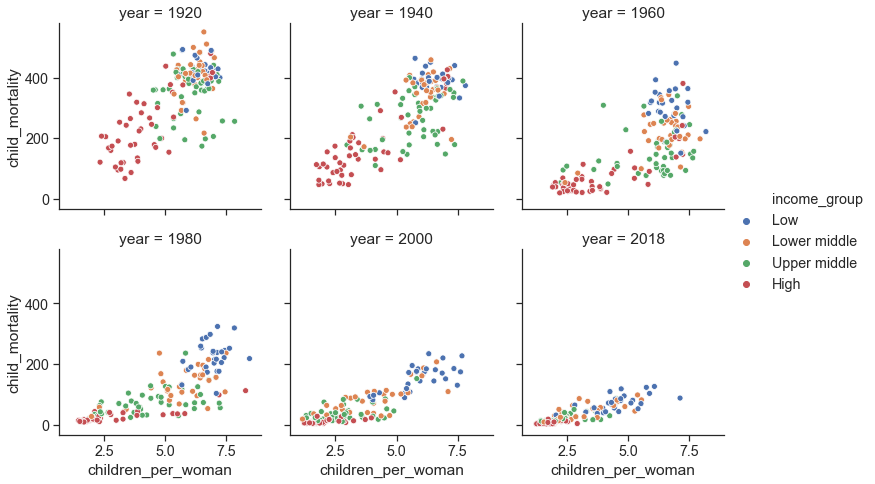

In [41]:
world_data_1920_2018 = world_data.loc[world_data['year'].isin([1920, 1940, 1960, 1980, 2000, 2018])]
                                 
sns.relplot(x='children_per_woman', y='child_mortality', col='year', hue='income_group',
            data=world_data_1920_2018, col_wrap=3, height=3.5)

It is clear that there is a relationship between these variables, but remember that the income groups are according to the world bank definition in 2018. So in 1920 those red dots did not have high income. To see economic status at the time, we can use the income reported for that time.

The hue can be changed to a quantitatitive instead of categorical variable which will be represented as a continuous instead of a discerete color map.

<!-- TODO in dataaset description, emphasize that income groups are 2018 levels -->

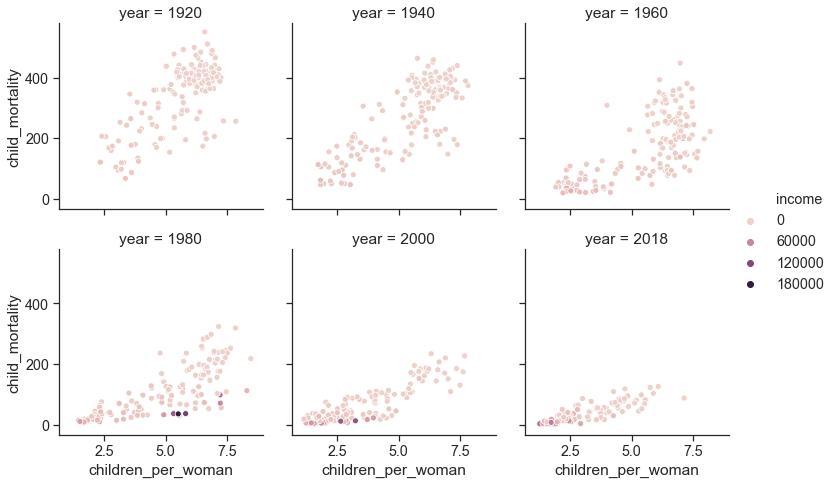

In [42]:
sns.relplot(x='children_per_woman', y='child_mortality', col='year', hue='income',
            data=world_data_1920_2018, col_wrap=3, height=3.5)

Since there are a few countries with very high income, the color scale is a bit off. 

24179.999999999996

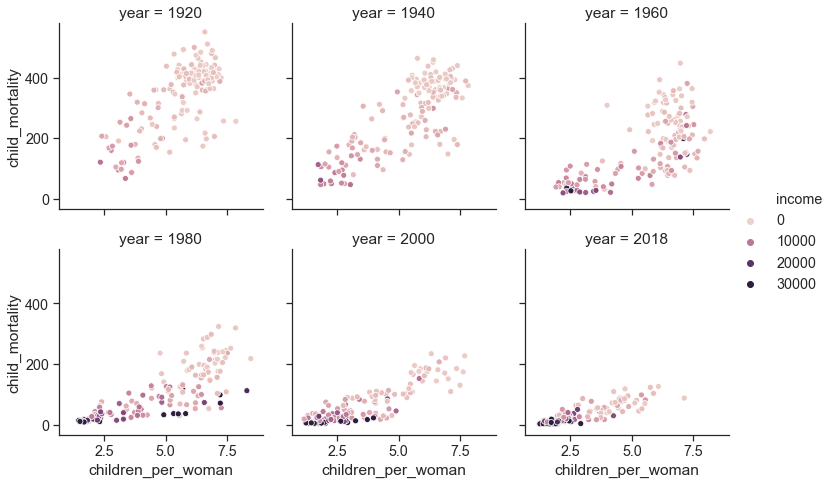

In [43]:
# TODO this and the next cell might be considered too advanced for this workshop
hue_norm_max = world_data_1920_2018['income'].quantile(0.9)
sns.relplot(x='children_per_woman', y='child_mortality', col='year', hue='income',
            hue_norm=(0, hue_norm_max), data=world_data_1920_2018, col_wrap=3, height=3.5)
hue_norm_max # check what the value actually was

It might be more suitable with a log normalization.

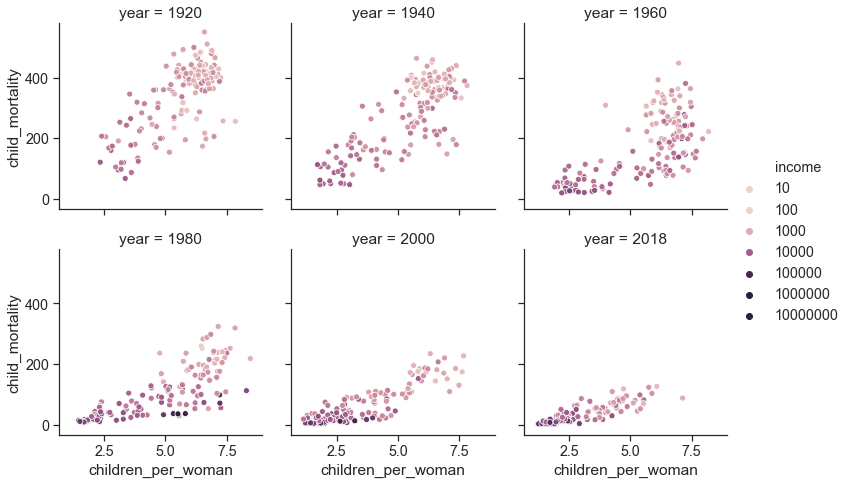

In [44]:
from matplotlib.colors import LogNorm
sns.relplot(x='children_per_woman', y='child_mortality', col='year', hue='income', hue_norm=LogNorm(),
            data=world_data_1920_2018, col_wrap=3, height=3.5)

Here, the same relationship as above can be seen, where high income, low child mortality, and few children per woman are all related.

To accentuate the hue and help for people with color impaired vision, the hue and size parameter can be set to the same quantitative variable. The hue can be changed to any [matplotlib colormap](https://matplotlib.org/users/colormaps.html) via the `palette` keyword.

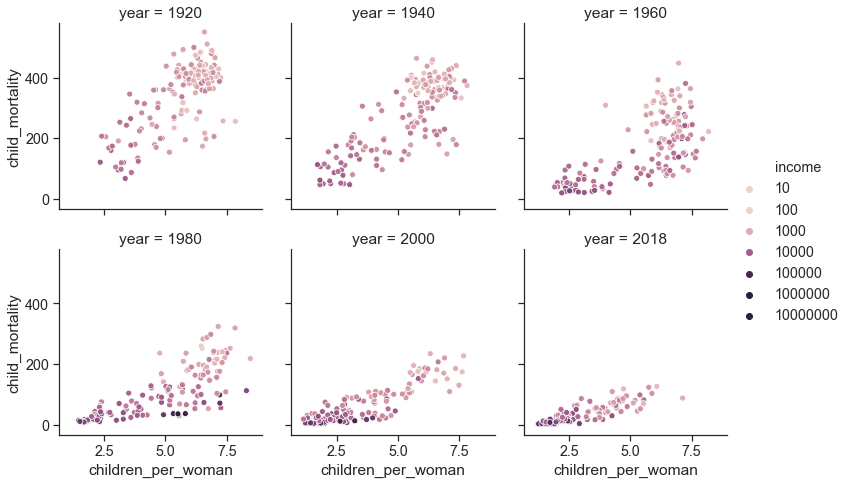

In [45]:
from matplotlib.colors import LogNorm
sns.relplot(x='children_per_woman', y='child_mortality', col='year', hue='income', hue_norm=LogNorm(),
            data=world_data_1920_2018, col_wrap=3, height=3.5)

In the exercises above, we chose suitable variables to illustrate the plotting concepts. Often when doing EDA, it will not be as easy to know what comparison to start with. Unless you have good reason for choosing to look at a particular relationship, starting by plotting the pairwise relationships of all quantitative variables can be helpful.

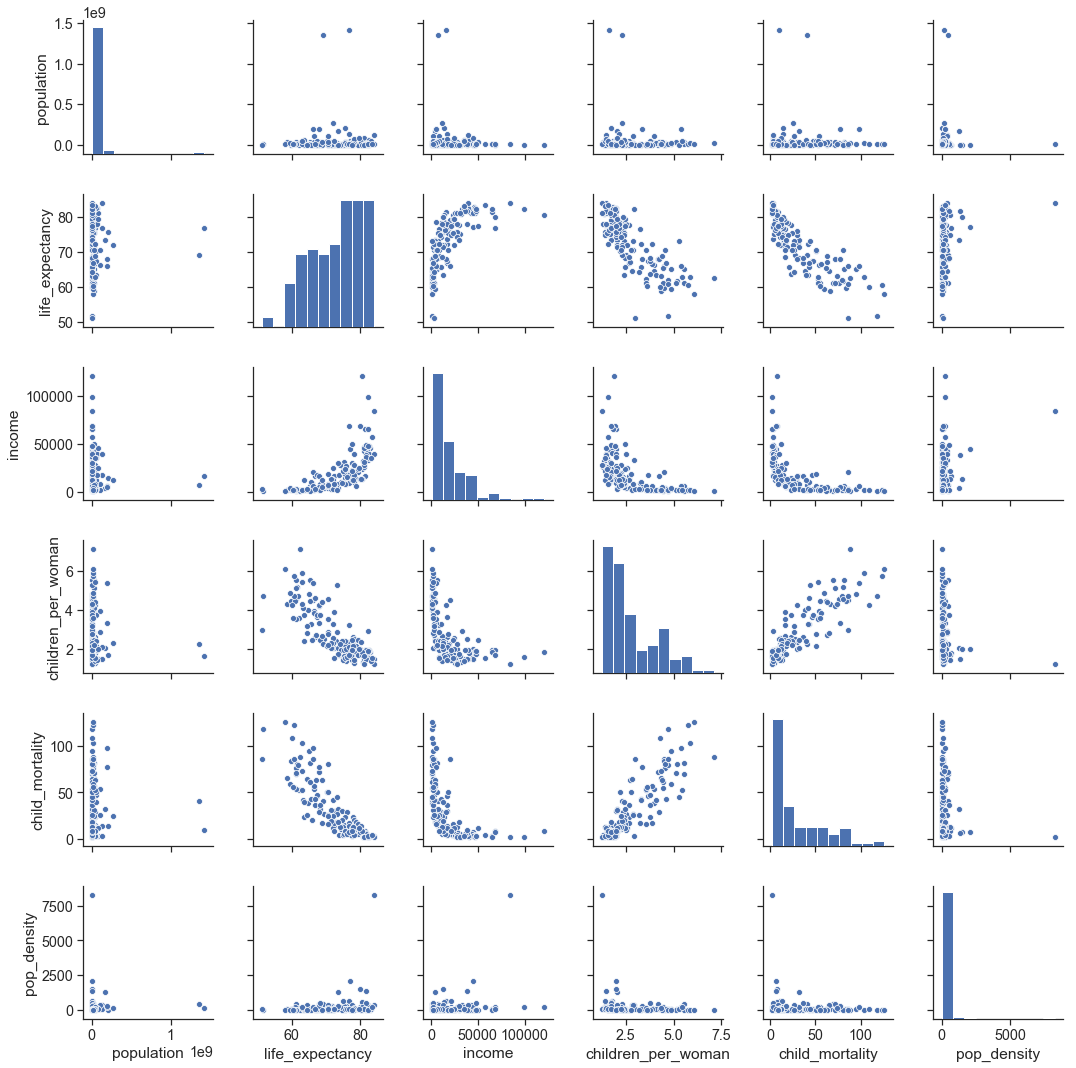

In [46]:
# TODO maybe change to another year to get CO2 values
# Drop year column which is not that useful and co2 since it is all NA for 2018
sns.pairplot(world_data_2018.drop(['year', 'co2_emissions'], axis=1))

*describe graph, upper mirror lower, histo etc*

There are clearly some very interesting relationships here. Can look more formally by finding out the correlation coeffiecinet (pearson R by default)

In [47]:
# world_data_2018.corr()
world_data_2018.drop(['year', 'co2_emissions'], axis=1).corr()

,population,life_expectancy,income,children_per_woman,child_mortality,pop_density
population,1.000000,0.004044,-0.064891,-0.063777,0.003577,0.011617
life_expectancy,0.004044,1.000000,0.674777,-0.800990,-0.860921,0.177621
income,-0.064891,0.674777,1.000000,-0.544940,-0.566530,0.287179
children_per_woman,-0.063777,-0.800990,-0.544940,1.000000,0.874784,-0.148088
child_mortality,0.003577,-0.860921,-0.566530,0.874784,1.000000,-0.121013
pop_density,0.011617,0.177621,0.287179,-0.148088,-0.121013,1.000000


Let's zoom in on the relationship between income and life expectancy which appears to be quite strong.

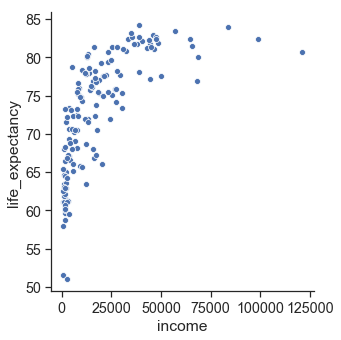

In [48]:
sns.relplot(x='income', y='life_expectancy', data=world_data_2018)

This relationship appears to be log linear and can be visualized with the x-axis set to log-scale.

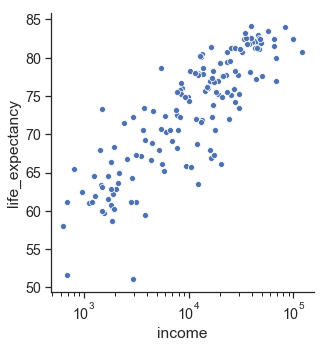

In [49]:
# Explain that a grid is returned before this
g = sns.relplot(x='income', y='life_expectancy', data=world_data_2018)
g.ax.set_xscale('log')

Coloring by regions revales further structure in the data.

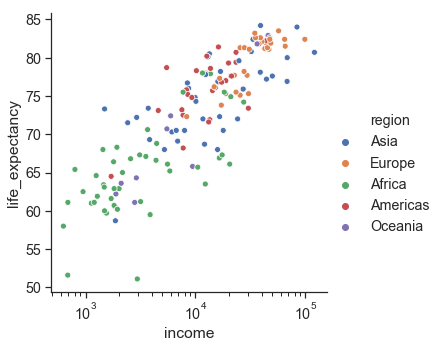

In [50]:
# TODO maybe unneceassry since very similar to what has been done before.
g = sns.relplot(x='income', y='life_expectancy', hue='region', data=world_data_2018)
g.ax.set_xscale('log')

The `hue` parameter is also available in the pairplot.

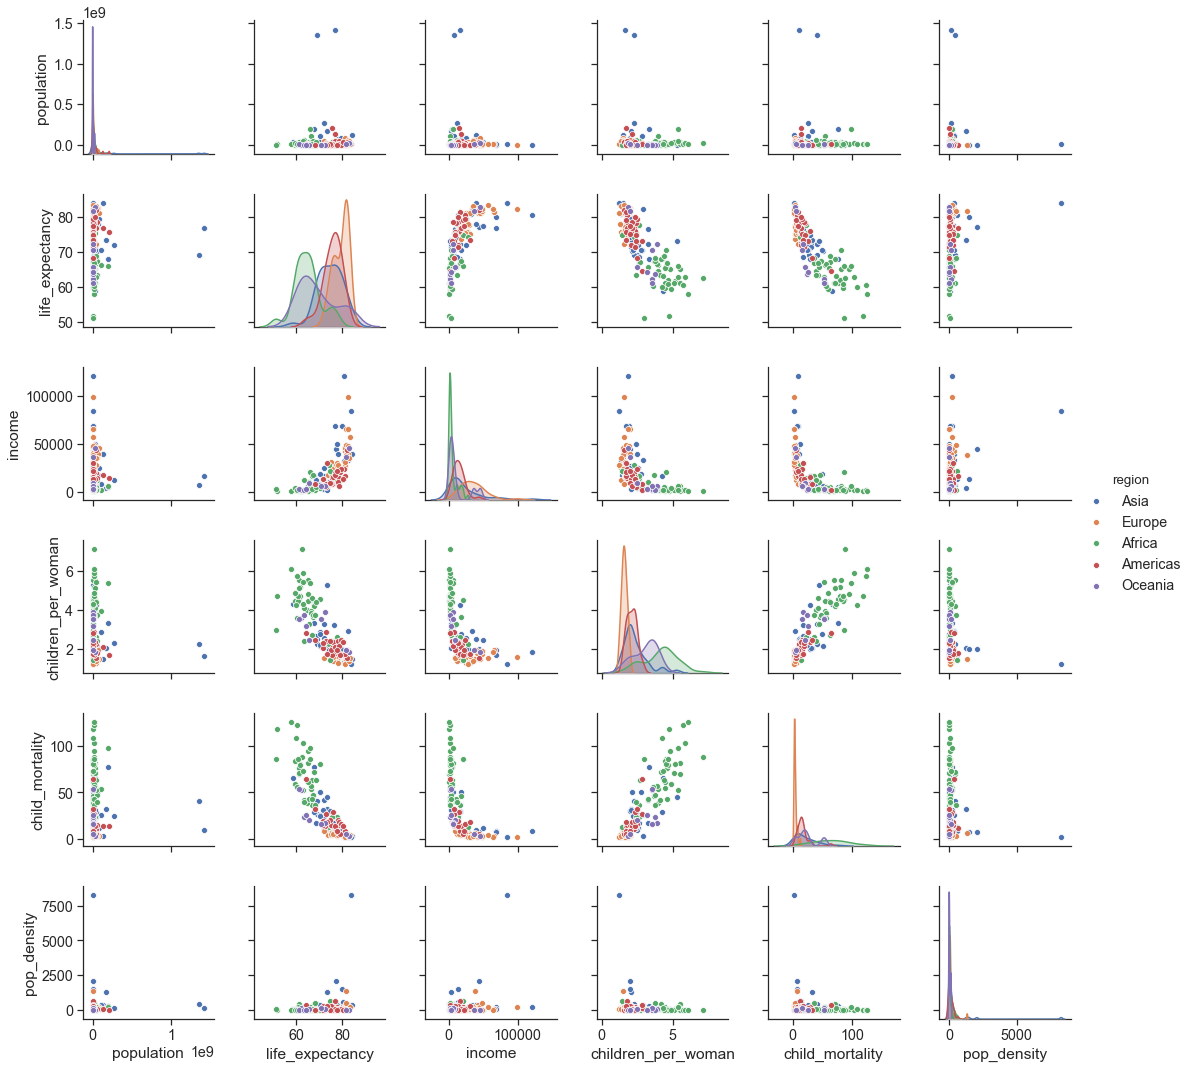

In [51]:
sns.pairplot(world_data_2018.drop(['year', 'co2_emissions'], axis=1), hue='region')

Note that this changed the histograms to KDE (kernel density estimate) plots, which we will talk mor eabout later. Overall, this can be an informative plot when exploring the data, but it is probably to busy to effectively convery a message to the audience, and for that purpose a plot focused on a subset of the information will probably be more successful.

## Exploring a single quantitative variable across multiple levels of a categorical variable

When exploring a single quantitative variable, we can choose between plotting every data point (e.g. categorical scatterplots such as swarm plots and strip plots), an approximation of the distribution (e.g. histograms and violinplots), or several distribution statistics including measures of central tendency (e.g. boxplots and barplots).

A good place to start is to visualize the variable's distribution with `distplot()`.

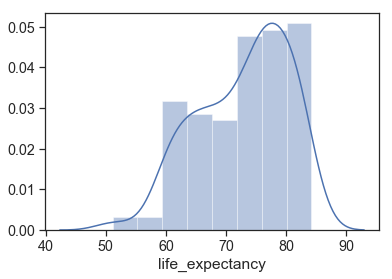

In [52]:
sns.distplot(world_data_2018['life_expectancy'])

The line is a KDE (kernel density estimate) plot, as seen previously in the pairplot. This can be thought of as a smoothened histogram. Technically, each data point is plotted as a kernel (a distribution), and where the kernels of multiple data points overlap their height will be added to finally determine the height of the line in the KDE plot. An illustration of this can be seen below and in the [seaborn tutorial](https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation).

![kde](kde-explanation.png)

To the left are the individual kernels and to the right the integrated plot for the entire distribution. Each observation can be seen as a vertical line along the x-axis. The default is to fit a gaussion (normal) kernel to each observation. If a square kernel would be fitted, the plot would look similar to a histogram.

`distplot()` can be customized to increase the number of bins and the bandwidth of the kernel. These are both calculated according to heuristics for what should be good numbers for the underlying data, but it is good to know how to control them.

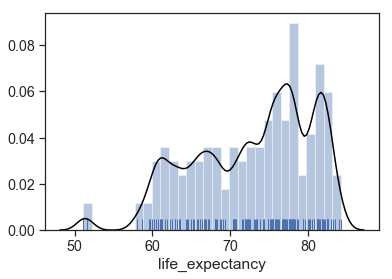

In [53]:
# TODO is this and the explanation of KDEs unnecessary?
sns.distplot(world_data_2018['life_expectancy'], bins=30, rug=True,
             kde_kws={'bw':1, 'color':'black'})

The rug plot shows exactly where each data point is along the x-axis. To compare distributions between categorical variables, violinplot are often used. These consist of two KDEs mirrored across the midline.

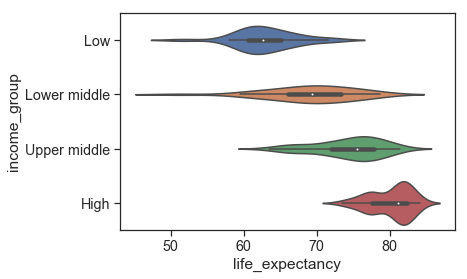

In [54]:
sns.violinplot(x='life_expectancy', y='income_group', data=world_data_2018)

Since we defined `income_group` as an ordered categorical variable previously, this order is used to distribute the income groups along the yaxis.

There is notable variation between income groups, which contributes to the mulitmodality seen in the distribution plot of the life expectancy for all countries in the world. However, there is also large overalap between income groups and variation within the groups, so there are more variables affecting the life expectancy than just the income 

In [55]:
# df['country'].loc[~df['country'].isin(world_data['country'].unique())]

In [56]:
# df= pd.read_clipboard()
# df['country'] = df.Country.str.split('[').str[0]
# df.head()

In [57]:
# how is that distributed related to income 10%

Dissecting multimodal distribution in this manner and trying to find underlying explaining variables to why a distribution appears to consist of many small distribution (multimodal) is common practice in EDA.

It looks like some income groups, e.g. "high", still consist of multimodal distributions. To explore these further, facetting can be used just as previosuly. The categorical equivalent of `relplot` is `catplot` (categorical plot).

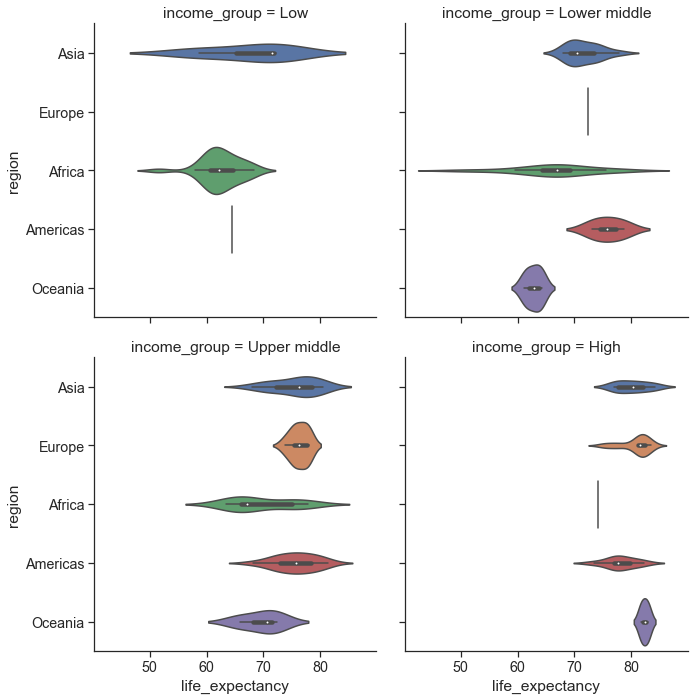

In [58]:
sns.catplot(x='life_expectancy', y='region', data=world_data_2018, kind='violin',
            col='income_group', col_wrap=2)

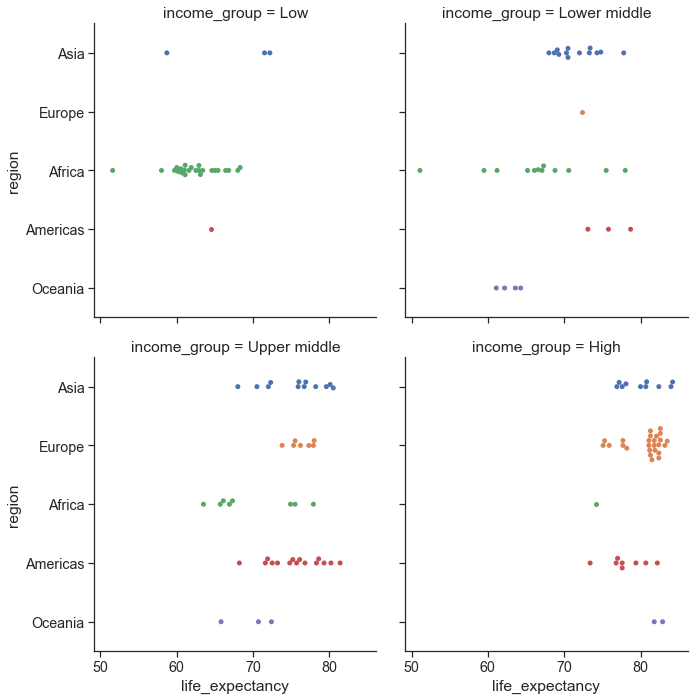

In [59]:
sns.catplot(x='life_expectancy', y='region', data=world_data_2018, kind='swarm',
            col='income_group', col_wrap=2)

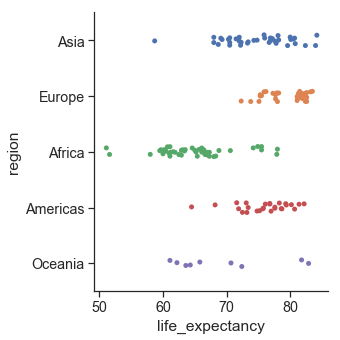

In [60]:
sns.catplot(x='life_expectancy', y='region', data=world_data_2018)

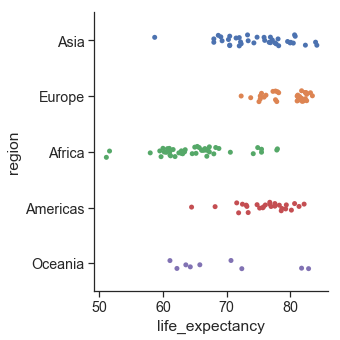

In [61]:
sns.catplot(x='life_expectancy', y='region', data=world_data_2018)

The default is a `stripplot` a type of categorical scatterplot where the dots are randomly jittered to not overlap. This is very fast, but it is sometimes hard to see how many dots are in a group due to overlap of the graphical elements. A more ordered approach is to create a another type of categorical scatterplot, a so called swarmplot, where the dots are positioned so that they are guaranteed not to overlap.

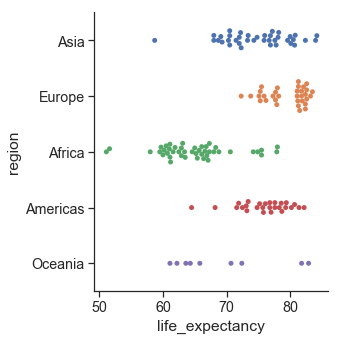

In [62]:
sns.catplot(x='life_expectancy', y='region', data=world_data_2018, kind='swarm')

Now it is clear where the most points are. A drawback is that this method can be slow for large datasets. For really large datasets, even stripplot is slow and it is necessary to approximate the distributions with a violinplot instead of showing each observation. Or show some distribution statistics instead, such as with a boxplot (more on that later).

Now we can use color to find out that differences in regions are often related to income level.

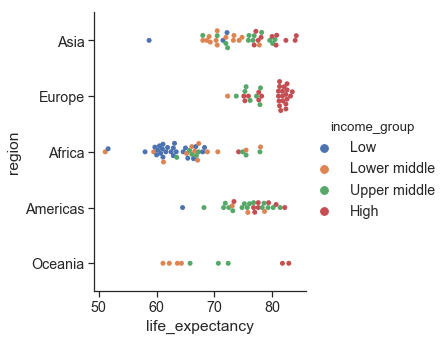

In [63]:
sns.catplot(x='life_expectancy', y='region', data=world_data_2018,
            hue='income_group', kind='swarm')

In [64]:
world_data.head()

,country,year,population,region,sub-region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_emissions
0,Afghanistan,1800,3280000,Asia,Southern Asia,Low,28.2,603,7.0,469.0,NaN,NaN
1,Afghanistan,1801,3280000,Asia,Southern Asia,Low,28.2,603,7.0,469.0,NaN,NaN
2,Afghanistan,1802,3280000,Asia,Southern Asia,Low,28.2,603,7.0,469.0,NaN,NaN
3,Afghanistan,1803,3280000,Asia,Southern Asia,Low,28.2,603,7.0,469.0,NaN,NaN
4,Afghanistan,1804,3280000,Asia,Southern Asia,Low,28.2,603,7.0,469.0,NaN,NaN


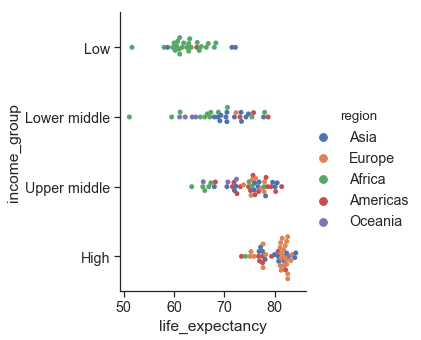

In [65]:
sns.catplot(x='life_expectancy', y='income_group', data=world_data_2018,
            kind='swarm', hue='region')

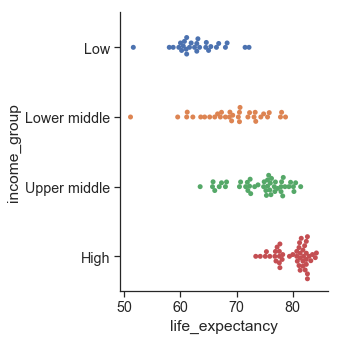

In [67]:
sns.catplot(x='life_expectancy', y='income_group', data=world_data_2018,
            kind='swarm')

The variable levels are automatically orederd and it is easy to see how life expactancy generally grow with higher average income.

One can see that the income might be more indicative.

WIth the powerful gridplots it is now easy to see how this income distribution has changed  . In contrast to a line plot with the average change over time, we can here see how the distribution itself changes, not just the average. While countries in general has increased their life execptancy, differences can be seen in how they have done it: Europe nad the Americas has gone from having countries with high and low life_expectancy levels to tighter distriutions where all countreis have high, while africa has transitioned from most countries having low life_exp through a period of very diverse life lengths depending on country.

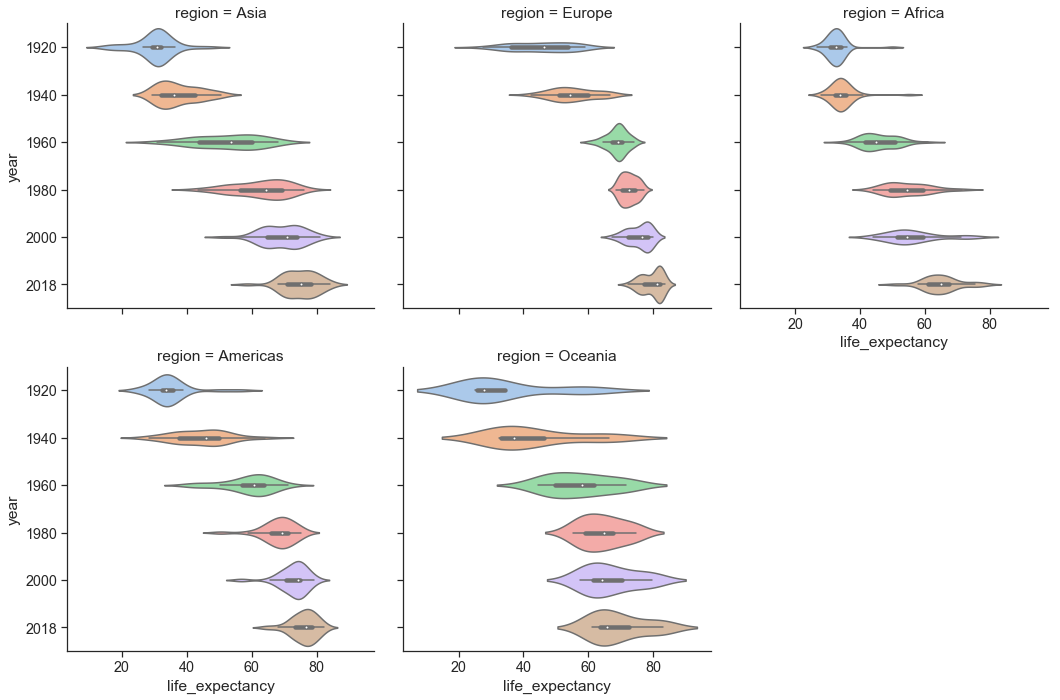

In [68]:
# If both columns can be interpretted as numerical, the orient keyword kan be added to be explicit
sns.catplot(x='life_expectancy', y='year', orient='horizontal', data=world_data_1920_2018, kind='violin',
            col='region', col_wrap=3, palette='pastel')

Let's see how much of the variation during the transition in African life expectancy can be explained by geogrphically close regions performing differently. First how many sub-regions are there in each Africa.

In [69]:
world_data_1920_2018.groupby('region')['sub-region'].nunique()

region
Africa      2
Americas    2
Asia        5
Europe      4
Oceania     4
Name: sub-region, dtype: int64

Two, what are those.

In [70]:
world_data_1920_2018.groupby('region')['sub-region'].unique()

region
Africa                  [Northern Africa, Sub-Saharan Africa]
Americas    [Latin America and the Caribbean, Northern Ame...
Asia        [Southern Asia, Western Asia, South-eastern As...
Europe      [Southern Europe, Western Europe, Eastern Euro...
Oceania     [Australia and New Zealand, Melanesia, Microne...
Name: sub-region, dtype: object

Let's see if sub-saharan and northern africa have had different development when it comes to life expectancy.

In [ ]:
# TODO include gender ration in school, maybe correlate with percentage religious and continent.
# TODO The split parameter can be done with landlocked instead
# The split parameter saves some space and looks slick
africa = pop_mult_years.loc[pop_mult_years['region'] == 'Africa']
sns.catplot(x='life_expectancy', y='year', orient='horizontal', data=africa, kind='violin',
            hue='sub-region', palette='pastel', split=True)

This was a great example on how mapping different variables to differnet plot elements can strip down confounding ariables and offer exlplnanations to the restuls

Now that we know `catplot`, it is very easy to create other plots such as a box plot. 

In [ ]:
sns.catplot(y='year', x='pop_density', orient='horizontal', data=pop_mult_years, kind='box',
            col='region', col_wrap=3, palette='pastel')

In [ ]:
sns.catplot(y='year', x='pop_density', orient='horizontal', data=pop_mult_years, kind='box',
            col='region', col_wrap=3, palette='pastel', sharex=False)

The aim of a box plot is to give information about the distribution of the data by displaying a specific set of data points from the distribution, which can give more information than just displaying the mean and standard deviation. All graphical elements in a box plots correspond to actual observations from the underlying data set (in contrast to how e.g. the mean and standard deviation are caluclated statistics of a data set). The `seaborn` box plots are so-called Tukey box plots by default, which means that the graphical elements correspond to the following statistics:

- The lines of the box represent the 25th, 50th (median), and 75th quantile in the data. These divide the data into four quartiles (0-25, 25-50, 50-75, 75-100).
- The whiskers represent the furthest points within 1.5 * the interquartile range (the distance between the 25th and 75th quantile).
- The flyers mark all individual observations that are outside the whiskers, which could be referred to as "outliers" (although there are many definitions of what could constitutes an outlier).

Most of these plot elements are configurable and could be set to represent different distribution statistics.

Another useful visualization for comparing distributions is the `violinplot`. Again, the syntax is the same as before, just change the plot name.

In [ ]:
# TODO somewhere mention to have the most imopratnt comparison the closes, so here time thousld be on X axis 
# so we can see the increasing trend regiht nedxt to each other.
pop_mult_years.loc[pop_mult_years.groupby(['region', 'year'])['pop_density'].idxmax().dropna()]

many small coutnries, let's look at only above 7 millino inhabitsnats

In [ ]:
pop_big = pop_mult_years.loc[pop_mult_years['population'] > 7000000]
sns.catplot(y='year', x='pop_density', orient='horizontal', data=pop_big, kind='swarm',
            col='region', col_wrap=3, palette='pastel')

# Possible additons Depending on what we want

- Combining two plots by using the FacetGrid interface directly.
- Countplot on something simple in the begiinnign, e.g. coutnriees per contientt. ALso menion barplot?




# =========== END ============

In [ ]:
sns.catplot(x='year', y='income', data=pop_mult_years, kind='strip', col='region', col_wrap=3)

In [ ]:
# A problem with the above is that people might want to know the name for the highest, which
# is not entirely straightforward... it is really better suited for interactive plotting.
pop_mult_years.loc[pop_mult_years.groupby(['region', 'year',])['income'].idxmax(), ['income', 'country', 'year']]

Default = random jitter, can see by making the plot many times. This is very fast and recommend for big dta sets. For small data set like this, we can use a more ordered appearance through swarm plots which avoids overlaps and hints at the distribution of the data.

In [ ]:
sns.catplot(x='region', y='life_expectancy', data=pop_reg_2018, kind='swarm')

To find out which those observation are with the higheset and lowest life expectancy, use gourpby.

In [ ]:
pop_reg_2018.nsmallest(10, 'life_expectancy')

# Somewhat convoluted ways to get the 5 smallest per region (with country name)
# pop_reg_2018.set_index('country').groupby(['region'])['life_expectancy'].nsmallest(5)
# pop_reg_2018.groupby(['region']).apply(lambda x: x.nsmallest(5, 'life_expectancy'))

In [ ]:
pop_reg_2018.nlargest(10, 'life_expectancy')

Seems like income group matters more than the continent, explore this.

In [ ]:
sns.catplot(x='income_group', y='life_expectancy', data=pop_reg_2018, kind='swarm')

This categorical value has an order and it is helpful to encode this information for the sorting on the x-axis.

In [ ]:
# Maybe get into pointplot later since it requires zorder.
sns.swarmplot(x='income_group', y='life_expectancy', data=pop_reg_2018, order=ord_cat, zorder=-100)
sns.pointplot(x='income_group', y='life_expectancy', data=pop_reg_2018, order=ord_cat, color='black')

Maybe we want to see if this relationship appear to be similar in similar countries.

Clearly see how different types of countries are distributed across the countries.

In [ ]:
sns.catplot(x='income_group', col='region',
            data=pop_reg_2018, kind='count', order=ord_cat, col_wrap=3)

That was about how long life, what about how affordable life? Although countries here are classified according to their income level, this takes into accoutn income in an internaitonal sense, how much buying power to people have in US dollars. A way of knowing how affordable a life in the country is is to instead adjust based on the prices of local things in the country. One way of doing this is PPP adjusted GDP/capita which takes into account a basket of goods. The big mac index is a type of PPP.

In [ ]:
sns.catplot(x='income_group', y='income', data=pop_reg_2018, kind='swarm', order=ord_cat)

In [ ]:
pop_reg_2018.groupby('income_group')['income'].agg(['min', 'max'])

Naturally, these measures are correlated, but it is also clear that countries within these classifications overlap significantly. At most, the purchasing power might be up to around threee times higher in a country of a lower income group.

Only from this data we could not say what causes what, but from other studies it has been shown that that increased welfare (income), leads to incrased security (less child deaths, longer lives), which in turn lowers the amount of children born. #TODO link rosling video

See some of the interesting relationships from above over time.

In [ ]:
# TODO can do this indiviusally first in lec 3 and then hav ethis good example of how it is better to melt
pop_reg_sub = world_data.melt(id_vars=['year', 'income_group'],
                               value_vars=['income', 'life_expectancy', 'population',
                                           'child_mortality', 'children_per_woman'])
# gridlines can be helpful for comparison, maybe just set style as above and then set it back
with sns.axes_style('darkgrid'):
    g = sns.relplot(x='year', y='value', col='variable', data=pop_reg_sub, kind='line', ci=None,
            facet_kws={'sharey':False}, col_wrap=3, hue='income_group')
# g.axes  grid(axis='y')

Ending population growth starts with saving poor children
https://www.gapminder.org/answers/will-saving-poor-children-lead-to-overpopulation/

In [ ]:
# move this to the last lecture? Also include shortly how to get coef, sstatsmodels or scikit learn
g = sns.lmplot(x='income', y='life_expectancy', logx=True, data=pop_reg_2018, truncate=True)
g.ax.set_xscale('log')

In [ ]:
import seaborn as sns

pop_reg_2018 = world_data.query('year == 2018')
sns.catplot(x='population', y='region', data=pop_reg_2018, kind='bar', estimator=sum, ci=None)
pop_reg_2018.groupby('region')['population'].sum().sort_values()

In [ ]:
world_data = world_data.loc[world_data['region'] != 'Oceania']
pop_per_subregion = world_data.groupby('sub-region')['population'].sum().sort_values()
sns.catplot(x='population', y='sub-region', data=world_data, kind='bar', estimator=sum, ci=None, order=pop_per_subregion.index)
pop_per_subregion

In [ ]:
world_data.to_csv('../data/world-data-gapminder.csv', index=False)

If we want to compare two columns/variables side by side, we can first create the overall layout of the figure and then add the `seaborn` plot to the desired axes objects via the `ax` parameter.

In [ ]:
# TODO probavy move this last will fit better with the flow, it's more layout oriented.
# TODO are perfectly straight lines an indication of missing data? Why would gapminder extrapolate like that?
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

sns.lineplot(x='year', y='population', hue='income_group', style='income_group',
             data=world_data, ci=None, estimator='sum', ax=ax1)

# Note that it make sense to look at the country average number of children per woman rather than the sum
sns.lineplot(x='year', y='children_per_woman', hue='income_group', style='income_group',
             data=world_data, ci=None, estimator='mean', ax=ax2, legend=False)
# `legend=False` because it is the same as in the first plot

fig.tight_layout()

Strangely, the world population seems to be increasing while countries' average number of children per woman is decreasing... To understand what is going on, additional variables need to be included in the plot. 

In [ ]:
# When the subplot grid has two rows and two columns, the function will return two arrays
# with two axes objects in each. The syntax below is used to assign these to separate variable
# names.
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))

sns.lineplot(x='year', y='population', hue='income_group', style='income_group',
             data=world_data, ci=None, estimator='sum', ax=ax1)
# Axes specific control over the appearance of the legend
ax1.legend(fontsize=12, frameon=False)
sns.lineplot(x='year', y='children_per_woman', hue='income_group', style='income_group',
             data=world_data, ci=None, estimator='mean', ax=ax2, legend=False)

# These are new plots
sns.lineplot(x='year', y='life_expectancy', hue='income_group', style='income_group',
             data=world_data, ci=None, estimator='mean', ax=ax3, legend=False)
sns.lineplot(x='year', y='child_mortality', hue='income_group', style='income_group',
             data=world_data, ci=None, estimator='mean', ax=ax4, legend=False)

fig.tight_layout()

Now it is clearer to see what is going on. Overall, the world is becoming a more hospital place to live where child mortality is quickly decreasing and life expectancy rapidly increasing. So although women give birth to fewer children, more of these children survive and adults are expected to live longer.

From a plot like this, it is not possible to tell causation, just correlation. However, in the [gapminder video library](https://www.gapminder.org/videos/) there are a few videos on this topic, including [this](https://www.gapminder.org/answers/will-saving-poor-children-lead-to-overpopulation/) and [this](https://www.gapminder.org/videos/population-growth-explained-with-ikea-boxes/) discussing how reducing poverty can help slow down population growth through decreased family sizes. Current estimations suggests that the word population will stabilize around 11 billion ppl and the children per woman will be close to 2 worldwide in year 2100.

In [ ]:
# TODO maybe include this in advanced, it is useful to see where the lines meet
# and if trends start at the same year for different variables.
pop_num = world_data.set_index('year')[[
    'population', 'life_expectancy', 'income',
    'children_per_woman', 'child_mortality']]
year_mean = pop_num.groupby('year').mean() 
pop_num_norm = (year_mean - year_mean.min()) / (year_mean.max() - year_mean.min())

ax = sns.lineplot(data=pop_num_norm, ci=None, lw=3)
ax.legend(fontsize=10, loc='upper left')
